In [0]:
#import library yang dibutuhkan
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam #adam :  untuk optimisasi berbasis stokastik 

import numpy as np #import library numpy untuk array
import matplotlib.pyplot as plt #import library untuk plot grafik, memvisualisasikan data

from sklearn.model_selection import train_test_split #untuk split data validasi, data training & data test



In [0]:
#load dataset dengan menggunakan library keras
fashion_mnist = keras.datasets.fashion_mnist
#Download and Save MNIST Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
#membagi data train menjadi data train dan data validation
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.1, random_state=1)
#test_size yaitu presentase data yang akan diuji

In [0]:
#label untuk kategori
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

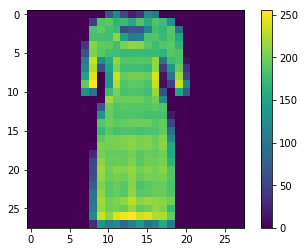

In [0]:
#menampilkan contoh data train
plt.figure() #untuk menciptakan object gambar
plt.imshow(x_train[0]) #untuk menampilkan gambar pada data train[0]
plt.colorbar() #menampilkan skala warna
plt.grid(False) #menghilangkan grid
plt.show() #menampilkan plot gambar

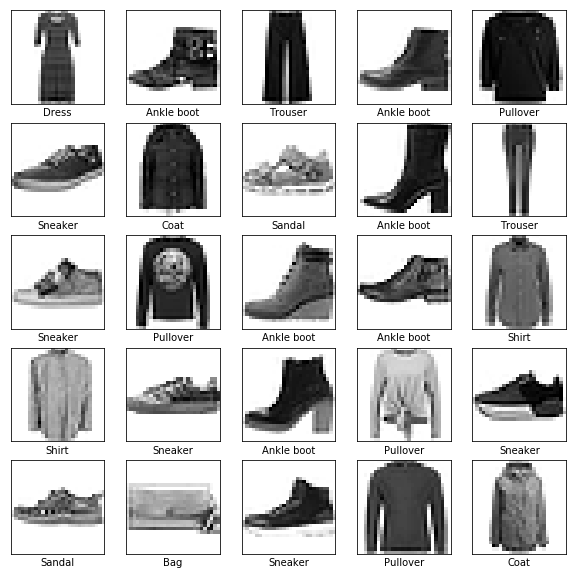

In [0]:
plt.figure(figsize=(10,10))  #Ini menciptakan objek gambar, yang memiliki lebar 10 inci dan tinggi 10 inci.
for i in range(25): #berisi 25 gambar 
    plt.subplot(5,5,i+1) #menciptakan gambar dengan ukuran 5 x 5
    plt.xticks([]) #untuk nama sumbu x
    plt.yticks([]) #untuk nama sumbu y
    plt.grid(False) #untuk menghilangkan grid
    plt.imshow(x_train[i], cmap=plt.cm.binary) #menampilkan gambar pada setiap data train
    plt.xlabel(class_names[y_train[i]]) #melabelkan sumbu x dengan nama setiap data train
plt.show() #menampilkan plot

In [0]:
im_rows = 28 #ukuran baris
im_cols = 28 #ukuran kolom
batch_size = 512 #jumlah sampel data yang disebarkan ke Neural Network
im_shape = (im_rows, im_cols, 1)
#Reshape dari matriks 28x28 
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (54000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (6000, 28, 28, 1)


In [0]:
#Build Model
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy', #untuk mengukur seberapa akurat model selama training
    optimizer=Adam(lr=0.001), #untuk melihat bagaimana model berubah berdasarkan data yang dilihat dan juga loss function nya.
    metrics=['accuracy']  #untuk memantau tiap langkah dalam proses training dan testing. Pada analisis ini digunakan accuracy, seberapa akurat gambar-gambar yang berhasil diklasifikasikan dengan benar.
)

In [0]:
#proses training
history = cnn_model.fit(
    x_train, y_train, batch_size=batch_size, #Memasukkan data train ke dalam model
    epochs=10, verbose=1, #epochs : jumlah iterasi training dengan rambatan balik, 
    validation_data=(x_validate, y_validate) 
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 30us/step - loss: 8.6126 - acc: 0.4539 - val_loss: 8.2831 - val_acc: 0.4807
Epoch 2/10
54000/54000 [==============================] - 1s 18us/step - loss: 8.2441 - acc: 0.4801 - val_loss: 7.7302 - val_acc: 0.5015
Epoch 3/10
54000/54000 [==============================] - 1s 18us/step - loss: 1.5763 - acc: 0.6818 - val_loss: 0.7916 - val_acc: 0.7592
Epoch 4/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.6231 - acc: 0.8100 - val_loss: 0.4838 - val_acc: 0.8303
Epoch 5/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.3764 - acc: 0.8632 - val_loss: 0.3667 - val_acc: 0.8685
Epoch 6/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.3091 - acc: 0.8881 - val_loss: 0.3322 - val_acc: 0.8808
Epoch 7/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.2799 - acc: 0.8962 - val_loss: 0.3175 - val_acc:

In [0]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0])) #manampilkan nilai dari test loss
print('test acc: {:.4f}'.format(score[1])) #menampilkan nilai dari test acc

test loss: 0.3151
test acc: 0.8945


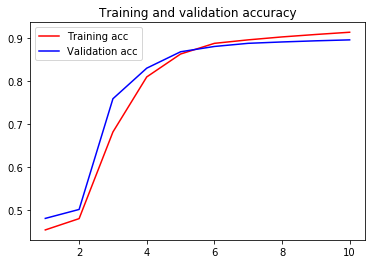

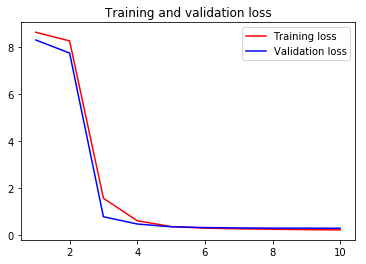

In [0]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy') #memberi nama pada grafik
plt.plot(epochs, acc, 'red', label='Training acc') #melabeli training acc berwarna merah
plt.plot(epochs, val_acc, 'blue', label='Validation acc') #melabeli validation acc berwarna biru
plt.legend() #untuk membuat plot yang menandai setiap jenis garis

plt.figure() #menghasilkan plot gambar
plt.title('Training and validation loss') #memberi nama pada grafik
plt.plot(epochs, loss, 'red', label='Training loss') #melabeli training loss berwarna merah
plt.plot(epochs, val_loss, 'blue', label='Validation loss') #melabeli validation loss berwarna biru

plt.legend() #untuk membuat plot yang menandai setiap jenis garis

plt.show() #menampilkan plot gambar

In [0]:
predictions = cnn_model.predict(x_test)

In [0]:
predictions[2]

array([4.4421161e-15, 1.0000000e+00, 1.4434138e-17, 2.6655644e-14,
       2.4974121e-14, 1.6394113e-11, 1.5166433e-16, 5.1377875e-09,
       3.5207484e-17, 2.1582924e-23], dtype=float32)

In [0]:
np.argmax(predictions[2])

1

In [0]:
def plot_image(i, predictions_array, true_label, img):

  new_shape = (im_rows, im_cols)
  img = img.reshape(img.shape[0], *new_shape)
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777") 
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

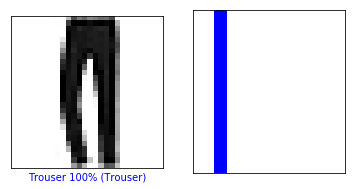

In [0]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

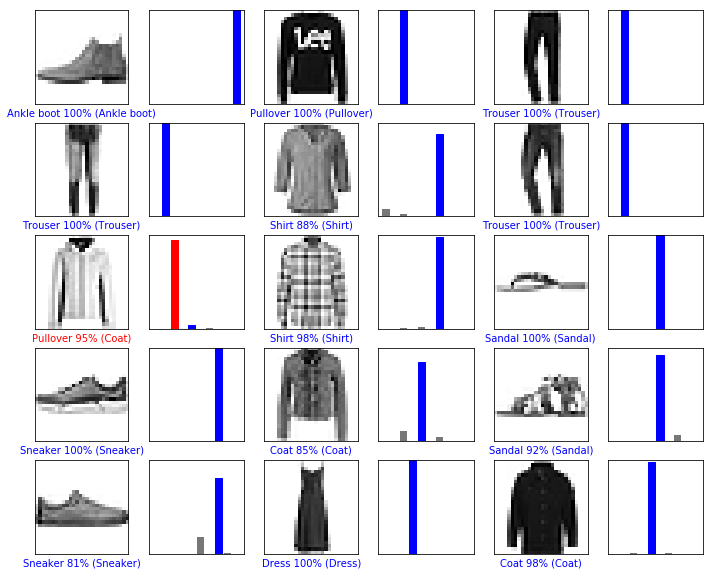

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [0]:
predicted_classes = cnn_model.predict_classes(x_test)

# get the indices to be plotted
correct = np.nonzero(predicted_classes==y_test)[0]
incorrect = np.nonzero(predicted_classes!=y_test)[0]

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.85      0.85      1000
     Class 1       0.99      0.97      0.98      1000
     Class 2       0.79      0.83      0.81      1000
     Class 3       0.90      0.90      0.90      1000
     Class 4       0.80      0.84      0.82      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.72      0.67      0.70      1000
     Class 7       0.94      0.97      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



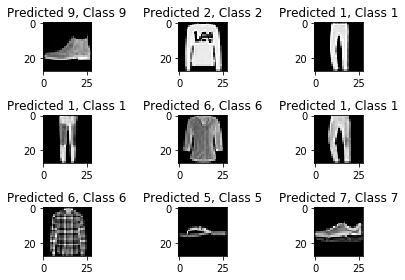

In [0]:
#untuk membuat plot beberapa gambar disertai dengan nilai prediksi mereka dalam bentuk kategori angka
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

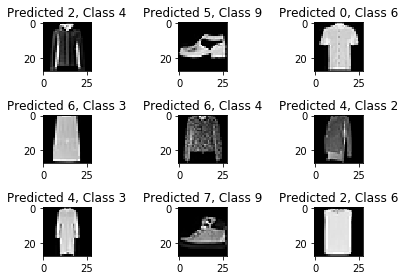

In [0]:
#untuk membuat plot beberapa gambar disertai dengan nilai prediksi mereka dalam bentuk kategori angka
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [0]:
cnn_model1 = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=im_shape),
    Conv2D(filters=32, kernel_size=3, activation='softmax', input_shape=im_shape),
    MaxPooling2D(pool_size=3),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='softmax'),
])

In [0]:
cnn_model1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [0]:
history1 = cnn_model1.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate)
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 69us/step - loss: 0.8468 - acc: 0.7542 - val_loss: 0.4582 - val_acc: 0.8418
Epoch 2/10
54000/54000 [==============================] - 3s 57us/step - loss: 0.3987 - acc: 0.8606 - val_loss: 0.3727 - val_acc: 0.8633
Epoch 3/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.3432 - acc: 0.8776 - val_loss: 0.3355 - val_acc: 0.8772
Epoch 4/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.3125 - acc: 0.8882 - val_loss: 0.3114 - val_acc: 0.8845
Epoch 5/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.2927 - acc: 0.8948 - val_loss: 0.2987 - val_acc: 0.8907
Epoch 6/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.2769 - acc: 0.9001 - val_loss: 0.2822 - val_acc: 0.8972
Epoch 7/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.2635 - acc: 0.9050 - val_loss: 0.2751 - val_acc:

In [0]:
score = cnn_model1.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print('test acc: {:.4f}'.format(score[1]))

test loss: 0.2669
test acc: 0.9006
